# **Titanic - ML Model for Prediction**
Author: André Paiva (Xornotor)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')
mpl.rcParams['figure.dpi'] = 100

In [2]:
df_train = pd.read_csv('./data/train.csv', index_col='PassengerId')
df_test = pd.read_csv('./data/test.csv', index_col='PassengerId')

In [3]:
df_train_filtered = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
with pd.option_context('mode.chained_assignment', None):
    df_train_filtered[['Pclass']] = df_train_filtered[['Pclass']].astype('category')
    df_train_filtered[['Embarked']] = df_train_filtered[['Embarked']].astype('category')
    df_train_filtered[['Sex']] = df_train_filtered[['Sex']].astype('category')
    df_train_filtered[['Survived']] = df_train_filtered[['Survived']].astype('int')

df_train_preproc = pd.get_dummies(df_train_filtered)
df_train_preproc.interpolate(method='linear', inplace=True)

train_X = df_train_preproc[['Age', 'SibSp', 'Parch', 'Fare',
                            'Pclass_1', 'Pclass_2', 'Pclass_3',
                            'Sex_female', 'Sex_male',
                            'Embarked_C', 'Embarked_Q', 'Embarked_S']].to_numpy()
train_Y = df_train_preproc[['Survived']].to_numpy().squeeze()

/tmp/ipykernel_29109/627598733.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


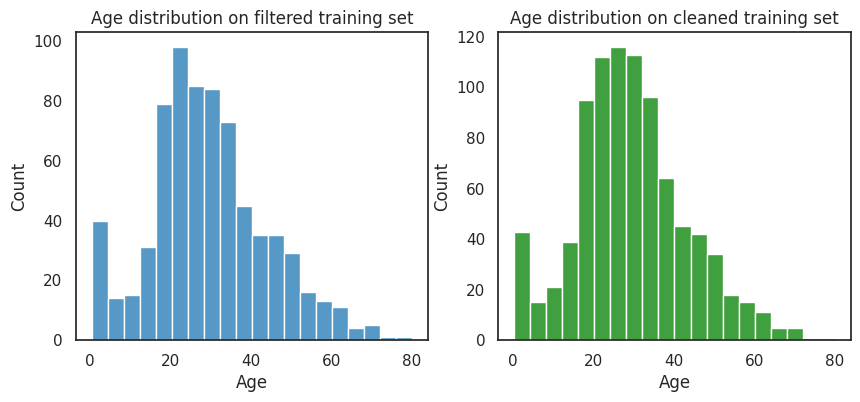

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_train_filtered, x='Age', ax=ax[0], bins=20)
sns.histplot(df_train_preproc, x='Age', ax=ax[1], bins=20, color='green')
ax[0].set_title('Age distribution on filtered training set')
ax[1].set_title('Age distribution on cleaned training set')
fig.show()

In [5]:
df_test_filtered = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
with pd.option_context('mode.chained_assignment', None):
    df_test_filtered[['Pclass']] = df_test_filtered[['Pclass']].astype('category')
    df_test_filtered[['Embarked']] = df_test_filtered[['Embarked']].astype('category')
    df_test_filtered[['Sex']] = df_test_filtered[['Sex']].astype('category')

df_test_preproc = pd.get_dummies(df_test_filtered)
df_test_preproc.interpolate(method='linear', inplace=True)

test_X = df_test_preproc[['Age', 'SibSp', 'Parch', 'Fare',
                          'Pclass_1', 'Pclass_2', 'Pclass_3',
                          'Sex_female', 'Sex_male',
                          'Embarked_C', 'Embarked_Q', 'Embarked_S']].to_numpy()

/tmp/ipykernel_29109/347859247.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


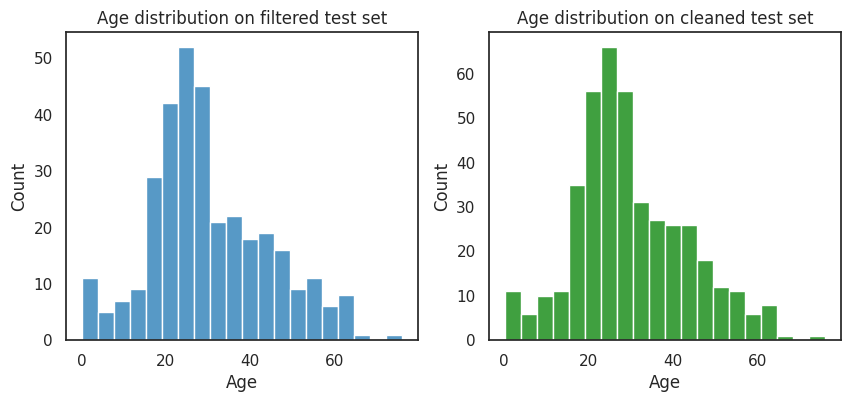

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_test_filtered, x='Age', ax=ax[0], bins=20)
sns.histplot(df_test_preproc, x='Age', ax=ax[1], bins=20, color='green')
ax[0].set_title('Age distribution on filtered test set')
ax[1].set_title('Age distribution on cleaned test set')
fig.show()

In [33]:
predictor = MLPClassifier((8, 4, 3, 2, 1),
                            activation='relu',
                            learning_rate='adaptive',
                            max_iter=1000,
                            alpha=10e-6,
                            n_iter_no_change=100)

predictor.fit(train_X, train_Y)

/home/and/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 4, 3, 2, 1),
              learning_rate='adaptive', max_iter=1000, n_iter_no_change=100)

In [34]:
metrics.accuracy_score(train_Y, predictor.predict(train_X))

0.8574635241301908

In [35]:
test_Y = predictor.predict(test_X)
df_test['Survived'] = test_Y
survivor_predictions = df_test['Survived']
survivor_predictions.to_csv("predictions.csv")
df_test.groupby('Survived')['Embarked'].count()

Survived
0    271
1    147
Name: Embarked, dtype: int64